In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
ms_posts_may = pd.read_csv('../data/raw/statuses_may2025_1k.csv')
ms_posts_may.head()

,id,uri,url,in_reply_to_id,in_reply_to_account_id,reblog,content,created_at,reblogs_count,favourites_count,...,poll.id,poll.expires_at,poll.expired,poll.multiple,poll.votes_count,poll.voted,poll.options,poll.emojis,poll.own_votes,poll.voters_count
0,114585434312751838,https://threads.net/ap/users/17841459235309838...,https://www.threads.com/@gulf.careerhunt/post/...,1.145854e+17,1.141669e+17,NaN,"<p>APPLY HERE <br><a href=""https://gulfcareerh...",2025-05-28 12:07:38+00:00,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,114585434286693109,https://mastodon.social/users/kkgwins09/status...,https://mastodon.social/@kkgwins09/11458543428...,NaN,NaN,NaN,NaN,2025-05-28 12:22:51.417000+00:00,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,114585434257153967,https://mastodont.cat/users/aldarull/statuses/...,https://mastodont.cat/@aldarull/11458543418423...,NaN,NaN,NaN,<p>💥📚 Setzè Aniversari Llibreria Aldarull 📚💥</...,2025-05-28 12:22:49+00:00,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,114585434224628814,https://mstdn.jp/users/wfhtony/statuses/114585...,https://mstdn.jp/@wfhtony/114585433581326493,NaN,NaN,NaN,<p>七月的JJC不能閘了（</p>,2025-05-28 12:22:40+00:00,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,114585434219758944,https://threads.net/ap/users/17841400626370033...,https://www.threads.com/@_eileenie_/post/DKMli...,NaN,NaN,NaN,"<p><a href=""https://www.dailymail.co.uk/news/a...",2025-05-28 12:07:33+00:00,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
from pathlib import Path


In [6]:
keep_cols = [
    'id',
    'created_at',
    'account.id',
    'account.acct',
    'account.username',
    'reblogs_count',
    'favourites_count',
    'replies_count',      
    'tag_list'
]
ms_posts_may_clean = ms_posts_may[keep_cols].copy()   
out_path = '../data/processed/statuses_may2025_clean.csv'
Path(out_path).parent.mkdir(parents=True, exist_ok=True)
ms_posts_may_clean.to_csv(out_path, index=False)

In [10]:
ms_posts_may_clean.head()

,id,created_at,account.id,account.acct,account.username,reblogs_count,favourites_count,replies_count,tag_list
0,114585434312751838,2025-05-28 12:07:38+00:00,114166863801324229,gulf.careerhunt@threads.net,gulf.careerhunt,0,0,0,[]
1,114585434286693109,2025-05-28 12:22:51.417000+00:00,110387198360636667,kkgwins09,kkgwins09,0,0,0,[]
2,114585434257153967,2025-05-28 12:22:49+00:00,108209072066903020,aldarull@mastodont.cat,aldarull,0,0,0,[]
3,114585434224628814,2025-05-28 12:22:40+00:00,109844269487844229,wfhtony@mstdn.jp,wfhtony,0,0,0,[]
4,114585434219758944,2025-05-28 12:07:33+00:00,112208905527015290,_eileenie_@threads.net,_eileenie_,0,0,0,[]


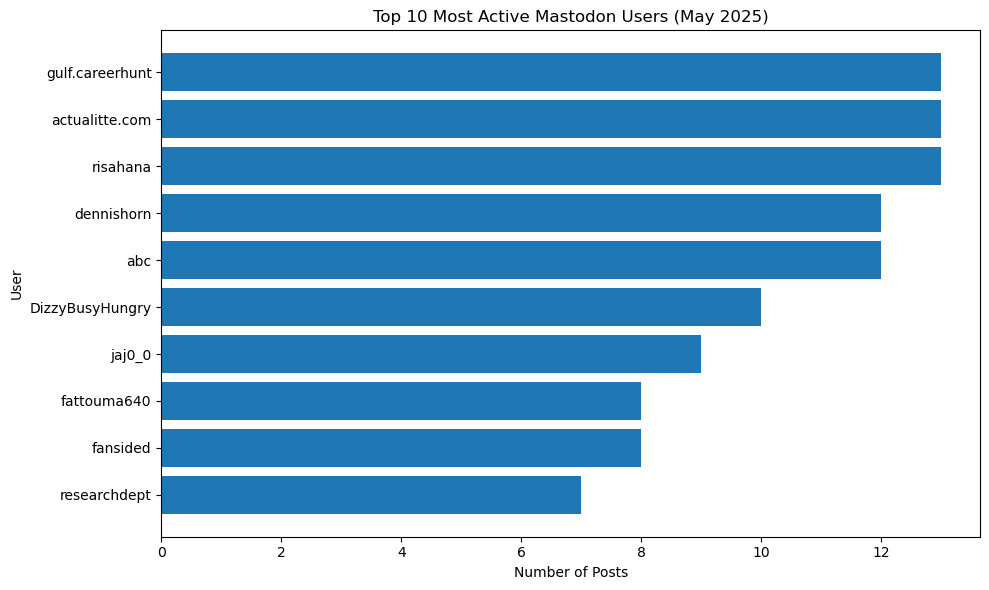

In [11]:
post_counts = (
    ms_posts_may_clean['account.username']
    .value_counts()
    .head(10)
    .sort_values()
)

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(post_counts.index, post_counts.values)
ax.set_xlabel('Number of Posts')
ax.set_ylabel('User')
ax.set_title('Top 10 Most Active Mastodon Users (May 2025)')
plt.tight_layout()
plt.show()

In [13]:
post_counts

account.username
researchdept        7
fansided            8
fattouma640         8
jaj0_0              9
DizzyBusyHungry    10
abc                12
dennishorn         12
risahana           13
actualitte.com     13
gulf.careerhunt    13
Name: count, dtype: int64

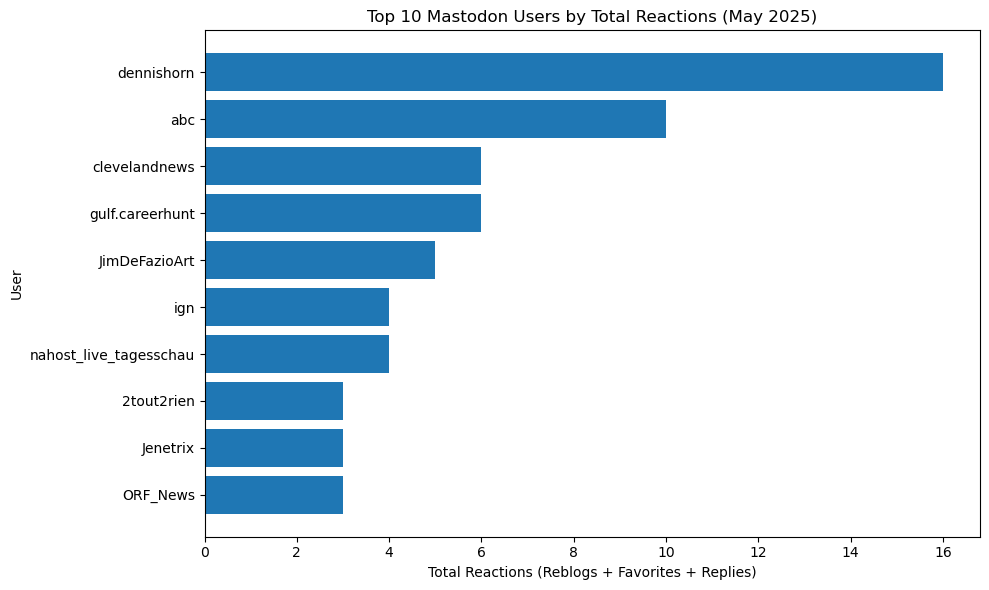

In [17]:
ms_posts_may_clean['total_reactions'] = (
    ms_posts_may_clean['reblogs_count'] +
    ms_posts_may_clean['favourites_count'] +
    ms_posts_may_clean['replies_count']
)

user_stats = (
    ms_posts_may_clean
    .groupby('account.username')
    .agg(
        total_reactions=('total_reactions', 'sum'),
        post_count=('id', 'count')
    )
    .reset_index()
)

top_by_reactions = (
    user_stats.nlargest(10, 'total_reactions')
    .set_index('account.username')
)

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(
    top_by_reactions.index[::-1],
    top_by_reactions['total_reactions'][::-1]
)
ax.set_xlabel('Total Reactions (Reblogs + Favorites + Replies)')
ax.set_ylabel('User')
ax.set_title('Top 10 Mastodon Users by Total Reactions (May 2025)')
plt.tight_layout()
plt.show()

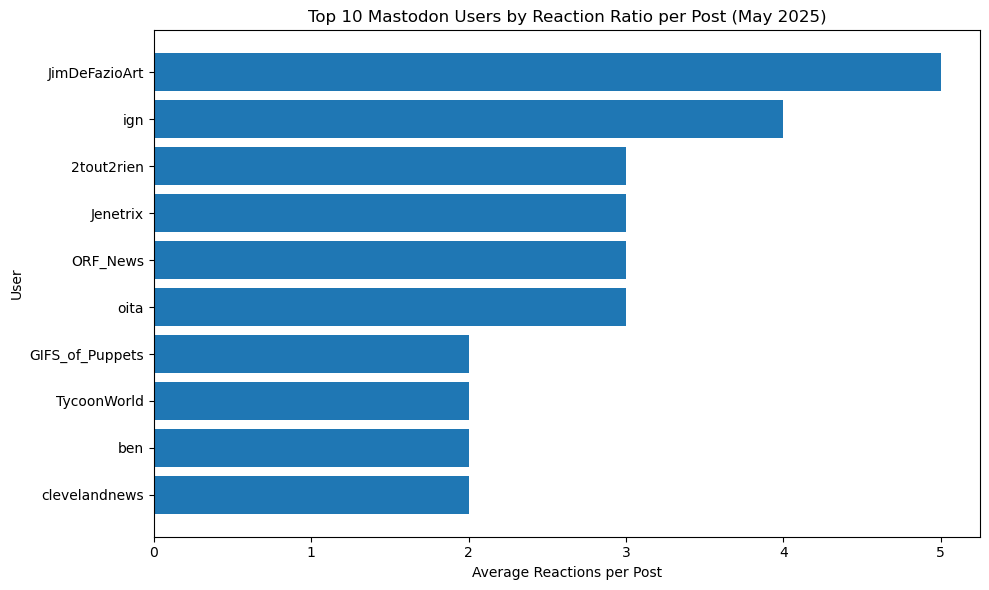

In [18]:
user_stats['reaction_ratio'] = (
    user_stats['total_reactions'] / user_stats['post_count']
)

top_by_ratio = (
    user_stats.nlargest(10, 'reaction_ratio')
    .set_index('account.username')
)

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(
    top_by_ratio.index[::-1],
    top_by_ratio['reaction_ratio'][::-1]
)
ax.set_xlabel('Average Reactions per Post')
ax.set_ylabel('User')
ax.set_title('Top 10 Mastodon Users by Reaction Ratio per Post (May 2025)')
plt.tight_layout()
plt.show()

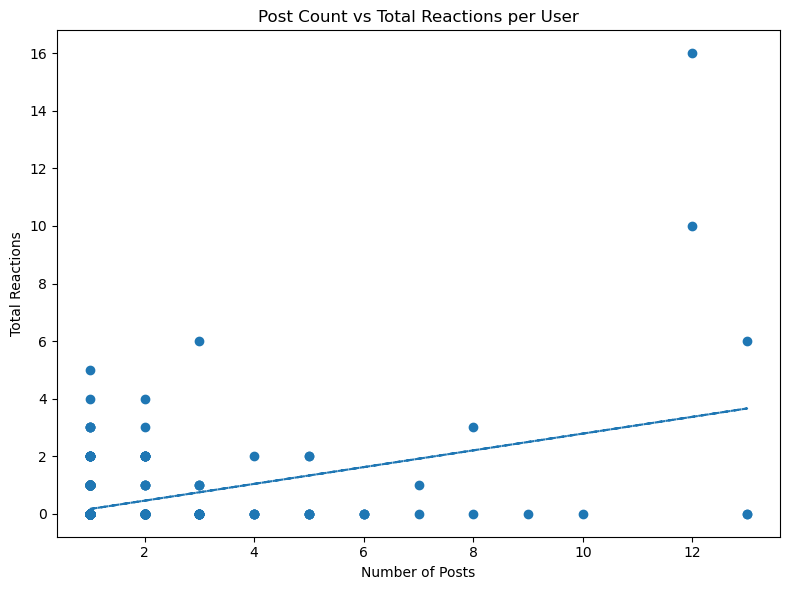

Spearman r (posts vs total reactions): 0.10, p=0.005


In [19]:
from scipy.stats import pearsonr, spearmanr

# Post count vs Total reactions
x1, y1 = user_stats['post_count'], user_stats['total_reactions']
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x1, y1)
m1, b1 = np.polyfit(x1, y1, 1)
ax.plot(x1, m1*x1 + b1, linestyle='--')
ax.set_xlabel('Number of Posts')
ax.set_ylabel('Total Reactions')
ax.set_title('Post Count vs Total Reactions per User')
plt.tight_layout()
plt.show()
r1, p1 = spearmanr(x1, y1)
print(f'Spearman r (posts vs total reactions): {r1:.2f}, p={p1:.3f}')

In [21]:
r1_pearson, p1_pearson = pearsonr(x1, y1)
print(f'Pearson r (posts vs total reactions): {r1_pearson:.2f}, p={p1_pearson:.3f}')

Pearson r (posts vs total reactions): 0.41, p=0.000


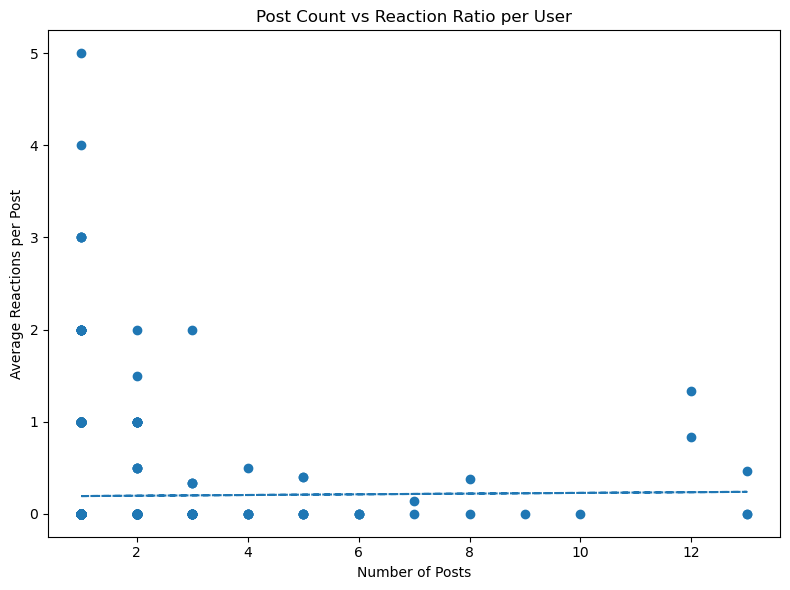

Spearman r (posts vs reaction ratio): 0.07, p=0.072


In [20]:
x2, y2 = user_stats['post_count'], user_stats['reaction_ratio']
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x2, y2)
m2, b2 = np.polyfit(x2, y2, 1)
ax.plot(x2, m2*x2 + b2, linestyle='--')
ax.set_xlabel('Number of Posts')
ax.set_ylabel('Average Reactions per Post')
ax.set_title('Post Count vs Reaction Ratio per User')
plt.tight_layout()
plt.show()
r2, p2 = spearmanr(x2, y2)
print(f'Spearman r (posts vs reaction ratio): {r2:.2f}, p={p2:.3f}')

In [23]:
ms_posts_may_clean.head(10)

,id,created_at,account.id,account.acct,account.username,reblogs_count,favourites_count,replies_count,tag_list,total_reactions
0,114585434312751838,2025-05-28 12:07:38+00:00,114166863801324229,gulf.careerhunt@threads.net,gulf.careerhunt,0,0,0,[],0
1,114585434286693109,2025-05-28 12:22:51.417000+00:00,110387198360636667,kkgwins09,kkgwins09,0,0,0,[],0
2,114585434257153967,2025-05-28 12:22:49+00:00,108209072066903020,aldarull@mastodont.cat,aldarull,0,0,0,[],0
3,114585434224628814,2025-05-28 12:22:40+00:00,109844269487844229,wfhtony@mstdn.jp,wfhtony,0,0,0,[],0
4,114585434219758944,2025-05-28 12:07:33+00:00,112208905527015290,_eileenie_@threads.net,_eileenie_,0,0,0,[],0
5,114585434193073776,2025-05-28 12:22:20+00:00,109299091794417958,lz@social.anoxinon.de,lz,0,0,0,"['melder', 'drogenhandel', 'leipzig', 'polizei...",0
6,114585434184558523,2025-05-28 12:22:44+00:00,647512,jaj0_0@mstdn.love,jaj0_0,0,0,0,[],0
7,114585434182680039,2025-05-28 12:22:46+00:00,111947943914140595,Kahte@masto.bike,Kahte,0,0,0,[],0
8,114585434143545714,2025-05-28 12:22:48+00:00,110475461227647928,vijesti@mastodon.hr,vijesti,0,0,0,[],0
9,114585434091606191,2025-05-28 12:22:47.313000+00:00,113540068034377893,rjszczerba.bsky.social@bsky.brid.gy,rjszczerba.bsky.social,0,0,0,[],0


In [25]:
df_tags = ms_posts_may_clean.explode('tag_list')
df_tags.head(10)

,id,created_at,account.id,account.acct,account.username,reblogs_count,favourites_count,replies_count,tag_list,total_reactions
0,114585434312751838,2025-05-28 12:07:38+00:00,114166863801324229,gulf.careerhunt@threads.net,gulf.careerhunt,0,0,0,[],0
1,114585434286693109,2025-05-28 12:22:51.417000+00:00,110387198360636667,kkgwins09,kkgwins09,0,0,0,[],0
2,114585434257153967,2025-05-28 12:22:49+00:00,108209072066903020,aldarull@mastodont.cat,aldarull,0,0,0,[],0
3,114585434224628814,2025-05-28 12:22:40+00:00,109844269487844229,wfhtony@mstdn.jp,wfhtony,0,0,0,[],0
4,114585434219758944,2025-05-28 12:07:33+00:00,112208905527015290,_eileenie_@threads.net,_eileenie_,0,0,0,[],0
5,114585434193073776,2025-05-28 12:22:20+00:00,109299091794417958,lz@social.anoxinon.de,lz,0,0,0,"['melder', 'drogenhandel', 'leipzig', 'polizei...",0
6,114585434184558523,2025-05-28 12:22:44+00:00,647512,jaj0_0@mstdn.love,jaj0_0,0,0,0,[],0
7,114585434182680039,2025-05-28 12:22:46+00:00,111947943914140595,Kahte@masto.bike,Kahte,0,0,0,[],0
8,114585434143545714,2025-05-28 12:22:48+00:00,110475461227647928,vijesti@mastodon.hr,vijesti,0,0,0,[],0
9,114585434091606191,2025-05-28 12:22:47.313000+00:00,113540068034377893,rjszczerba.bsky.social@bsky.brid.gy,rjszczerba.bsky.social,0,0,0,[],0


In [30]:
import ast

ms_posts_may_clean['tag_list'] = ms_posts_may_clean['tag_list'].apply(
    lambda cell: ast.literal_eval(cell) if isinstance(cell, str) else cell
)

df_tags = ms_posts_may_clean.explode('tag_list')
df_tags.head(10)


,id,created_at,account.id,account.acct,account.username,reblogs_count,favourites_count,replies_count,tag_list,total_reactions
0,114585434312751838,2025-05-28 12:07:38+00:00,114166863801324229,gulf.careerhunt@threads.net,gulf.careerhunt,0,0,0,NaN,0
1,114585434286693109,2025-05-28 12:22:51.417000+00:00,110387198360636667,kkgwins09,kkgwins09,0,0,0,NaN,0
2,114585434257153967,2025-05-28 12:22:49+00:00,108209072066903020,aldarull@mastodont.cat,aldarull,0,0,0,NaN,0
3,114585434224628814,2025-05-28 12:22:40+00:00,109844269487844229,wfhtony@mstdn.jp,wfhtony,0,0,0,NaN,0
4,114585434219758944,2025-05-28 12:07:33+00:00,112208905527015290,_eileenie_@threads.net,_eileenie_,0,0,0,NaN,0
5,114585434193073776,2025-05-28 12:22:20+00:00,109299091794417958,lz@social.anoxinon.de,lz,0,0,0,melder,0
5,114585434193073776,2025-05-28 12:22:20+00:00,109299091794417958,lz@social.anoxinon.de,lz,0,0,0,drogenhandel,0
5,114585434193073776,2025-05-28 12:22:20+00:00,109299091794417958,lz@social.anoxinon.de,lz,0,0,0,leipzig,0
5,114585434193073776,2025-05-28 12:22:20+00:00,109299091794417958,lz@social.anoxinon.de,lz,0,0,0,polizei,0
5,114585434193073776,2025-05-28 12:22:20+00:00,109299091794417958,lz@social.anoxinon.de,lz,0,0,0,spati,0


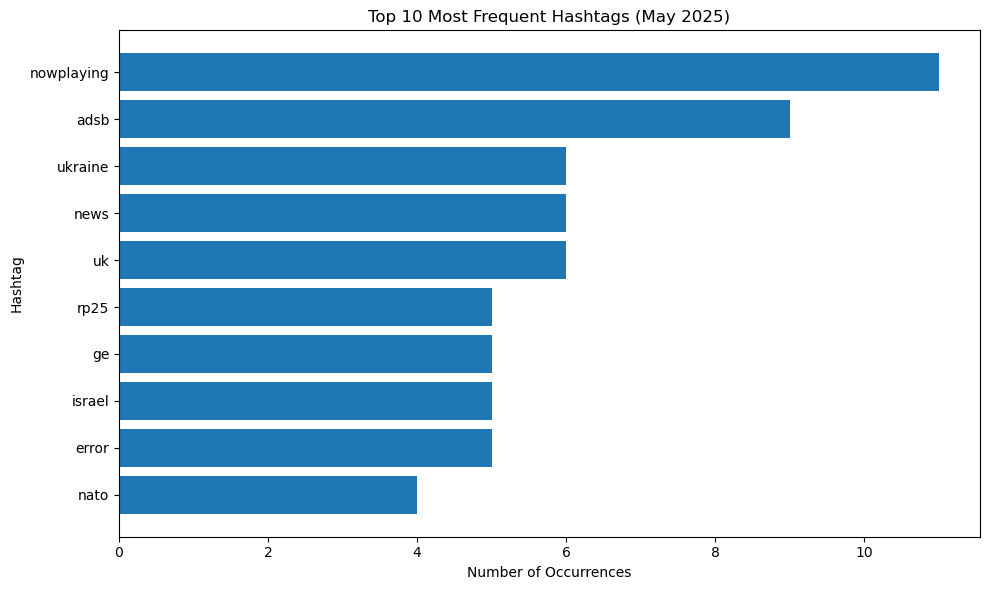

In [31]:
df_tags = df_tags[df_tags['tag_list'].notna() & (df_tags['tag_list'] != '')]

tag_counts = df_tags['tag_list'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(tag_counts.index[::-1], tag_counts.values[::-1])
ax.set_xlabel('Number of Occurrences')
ax.set_ylabel('Hashtag')
ax.set_title('Top 10 Most Frequent Hashtags (May 2025)')
plt.tight_layout()
plt.show()

In [32]:
import numpy as np
from scipy.stats import mannwhitneyu

In [35]:
ms_posts_may_clean['has_hashtag'] = ms_posts_may_clean['tag_list'].apply(lambda tags: len(tags) > 0)
ms_posts_may_clean.head(10)

,id,created_at,account.id,account.acct,account.username,reblogs_count,favourites_count,replies_count,tag_list,total_reactions,has_hashtag
0,114585434312751838,2025-05-28 12:07:38+00:00,114166863801324229,gulf.careerhunt@threads.net,gulf.careerhunt,0,0,0,[],0,False
1,114585434286693109,2025-05-28 12:22:51.417000+00:00,110387198360636667,kkgwins09,kkgwins09,0,0,0,[],0,False
2,114585434257153967,2025-05-28 12:22:49+00:00,108209072066903020,aldarull@mastodont.cat,aldarull,0,0,0,[],0,False
3,114585434224628814,2025-05-28 12:22:40+00:00,109844269487844229,wfhtony@mstdn.jp,wfhtony,0,0,0,[],0,False
4,114585434219758944,2025-05-28 12:07:33+00:00,112208905527015290,_eileenie_@threads.net,_eileenie_,0,0,0,[],0,False
5,114585434193073776,2025-05-28 12:22:20+00:00,109299091794417958,lz@social.anoxinon.de,lz,0,0,0,"[melder, drogenhandel, leipzig, polizei, spati]",0,True
6,114585434184558523,2025-05-28 12:22:44+00:00,647512,jaj0_0@mstdn.love,jaj0_0,0,0,0,[],0,False
7,114585434182680039,2025-05-28 12:22:46+00:00,111947943914140595,Kahte@masto.bike,Kahte,0,0,0,[],0,False
8,114585434143545714,2025-05-28 12:22:48+00:00,110475461227647928,vijesti@mastodon.hr,vijesti,0,0,0,[],0,False
9,114585434091606191,2025-05-28 12:22:47.313000+00:00,113540068034377893,rjszczerba.bsky.social@bsky.brid.gy,rjszczerba.bsky.social,0,0,0,[],0,False


In [47]:
no_hashtag = ms_posts_may_clean[ms_posts_may_clean['has_hashtag']==False]['total_reactions']
yes_hashtag = ms_posts_may_clean[ms_posts_may_clean['has_hashtag']==True]['total_reactions']
print(no_hashtag.mean())
print(yes_hashtag.mean())
u_stat, p_value = mannwhitneyu(yes_hashtag, no_hashtag, alternative='greater')
print(f'Mann-Whitney U statistic: {u_stat}, p-value: {p_value:.3f}')

0.18092566619915848
0.24041811846689895
Mann-Whitney U statistic: 105133.5, p-value: 0.142


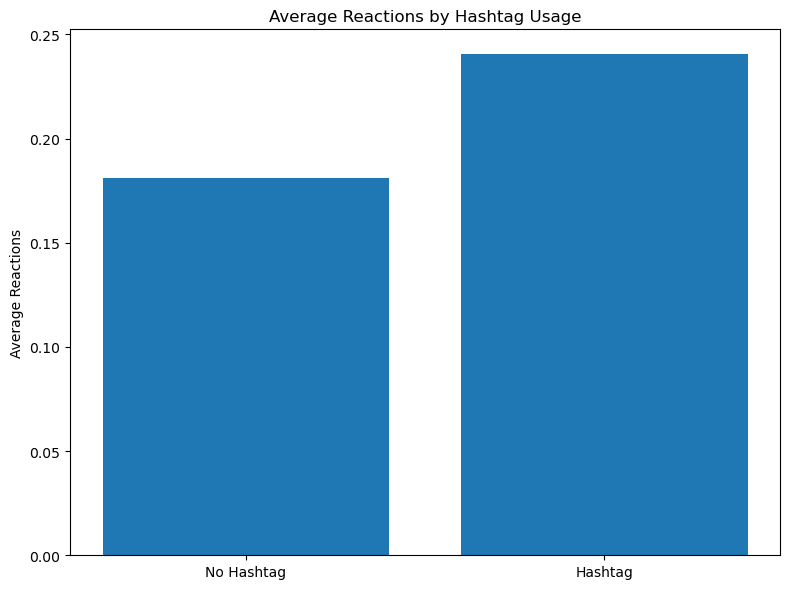

In [51]:
fig, ax = plt.subplots(figsize=(8,6))
ax.bar([0, 1], [no_hashtag.mean(), yes_hashtag.mean()], tick_label=['No Hashtag','Hashtag'])
ax.set_ylabel('Average Reactions')
ax.set_title('Average Reactions by Hashtag Usage')
plt.tight_layout()
plt.show()

In [45]:
U, p = mannwhitneyu(yes_hashtag, no_hashtag, alternative='greater')
print(f"Mann-Whitney U = {U:.1f}, p-value = {p:.3f}")


Mann-Whitney U = 105133.5, p-value = 0.142


In [49]:
tag_counts = df_tags['tag_list'].value_counts()
popular_tags = tag_counts.index[:10].tolist()
popular_tags

['nowplaying',
 'adsb',
 'ukraine',
 'news',
 'uk',
 'rp25',
 'ge',
 'israel',
 'error',
 'nato']

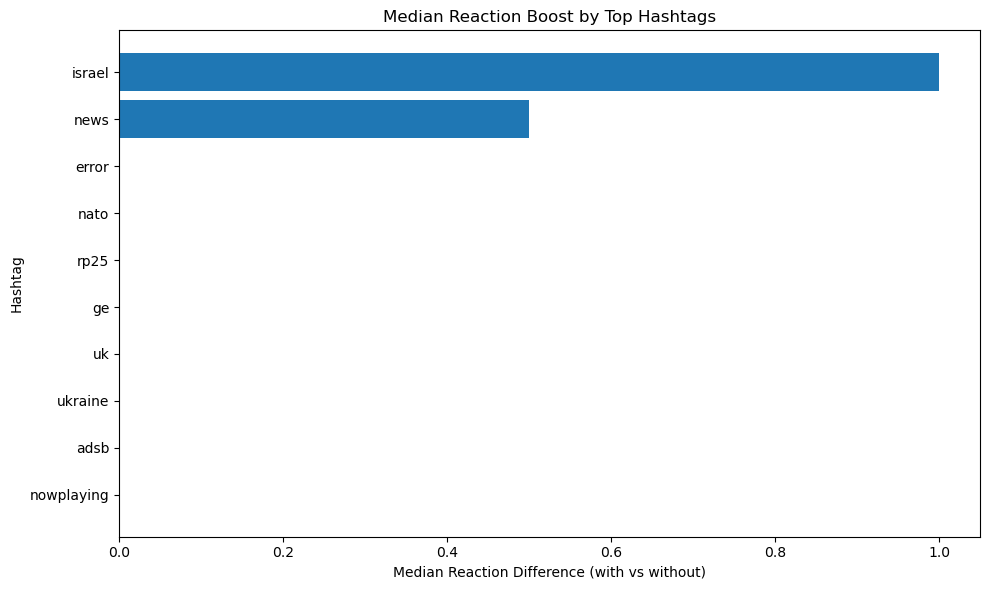

,n_posts,median_with,median_without,median_diff,p_value
hashtag,,,,,
nowplaying,11,0.0,0.0,0.0,0.742139
adsb,9,0.0,0.0,0.0,0.905353
ukraine,6,0.0,0.0,0.0,0.136260
uk,6,0.0,0.0,0.0,0.494667
ge,5,0.0,0.0,0.0,0.835711
rp25,5,0.0,0.0,0.0,0.416916
nato,4,0.0,0.0,0.0,0.325451
error,5,0.0,0.0,0.0,0.835711
news,6,0.5,0.0,0.5,0.014585


In [50]:
results = []
for tag in popular_tags:
    has_t = ms_posts_may_clean[ms_posts_may_clean['tag_list'].apply(lambda tags: tag in tags)]['total_reactions']
    no_t  = ms_posts_may_clean[~ms_posts_may_clean['tag_list'].apply(lambda tags: tag in tags)]['total_reactions']
    med_with = has_t.median()
    med_without = no_t.median()
    diff = med_with - med_without
    U_t, p_t = mannwhitneyu(has_t, no_t, alternative='greater')
    results.append({
        'hashtag': tag,
        'n_posts': len(has_t),
        'median_with': med_with,
        'median_without': med_without,
        'median_diff': diff,
        'p_value': p_t
    })

res_df = pd.DataFrame(results).set_index('hashtag').sort_values('median_diff')

# Bar chart: median_diff for each tag
fig, ax = plt.subplots(figsize=(10,6))
ax.barh(res_df.index, res_df['median_diff'])
ax.set_xlabel('Median Reaction Difference (with vs without)')
ax.set_ylabel('Hashtag')
ax.set_title('Median Reaction Boost by Top Hashtags')
plt.tight_layout()
plt.show()

# Display the summary table
res_df